In [98]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [99]:
data = pd.read_csv("BASE_AMBLIPIA.csv") 
cl1=data[data["DIAGNOSTICO"]=="AMBLIOPIA REFRACTIVA (ANISOMETROPICA)"]
cl2=data[data["DIAGNOSTICO"]=="AMBLIOPIA REFRACTIVA"]
frames = [cl1,cl2]
data_final = pd.concat(frames)

In [100]:
catB=data_final.values[:,4]
cat=[0]*len(catB)
for i in range(len(catB)):
    if catB[i]=='AMBLIOPIA REFRACTIVA (ANISOMETROPICA)':
        cat[i]=1

In [101]:
X = cl2.values[:,[8,9,10,12]]
scaler = StandardScaler()
scaled_X_OI = scaler.fit_transform(X)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [102]:
pca_oi = PCA(n_components = 1)
X_OI= pca_oi.fit_transform(scaled_X_OI)

In [103]:
X = cl2.values[:,[5,6,7,11]]
scaler = StandardScaler()
scaled_X_OD = scaler.fit_transform(X)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [104]:
pca_od = PCA(n_components = 1)
X_OD=principalComponents = pca_od.fit_transform(scaled_X_OD)

In [105]:
X_log = np.concatenate((X_OI, X_OD), axis=1)

In [106]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_OI,X_OD,test_size=0.25,random_state=40)

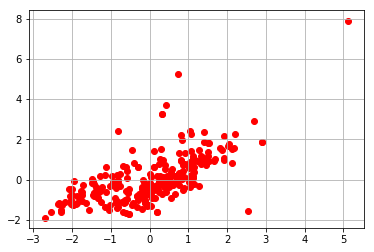

In [107]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(X_OI[:,0], X_OD[:,0],c='red')

plt.show()

In [108]:
X = cl1.values[:,[8,9,10,12]]
scaler = StandardScaler()
scaled_ani_OI = scaler.fit_transform(X)
ANI_OI= pca_oi.transform(scaled_ani_OI)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [109]:
X = cl1.values[:,[5,6,7,11]]
scaler = StandardScaler()
scaled_ani_OD = scaler.fit_transform(X)
ANI_OD= pca_od.transform(scaled_ani_OD)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


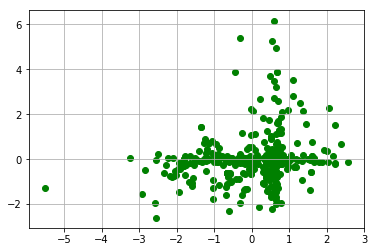

In [110]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(ANI_OI[:,0], ANI_OD[:,0],c='green')

plt.show()

In [111]:
import statsmodels.api as sm

t = X_OI
#t = sm.add_constant(t, prepend=False)
mod = sm.OLS(X_OD, t)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     210.5
Date:                Tue, 07 May 2019   Prob (F-statistic):           1.01e-35
Time:                        13:28:41   Log-Likelihood:                -352.77
No. Observations:                 273   AIC:                             707.5
Df Residuals:                     272   BIC:                             711.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6545      0.045     14.510      0.0

In [112]:
res.mse_resid

0.7789549220184606

In [113]:
X = data_final.values[:,[8,9,10,12]]
scaler = StandardScaler()
scaled_tot_OI = scaler.fit_transform(X)
tot_OI= pca_oi.transform(scaled_tot_OI)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [114]:
X = data_final.values[:,[5,6,7,11]]
scaler = StandardScaler()
scaled_tot_OD = scaler.fit_transform(X)
tot_OD= pca_od.transform(scaled_tot_OD)

/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/mundogn/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


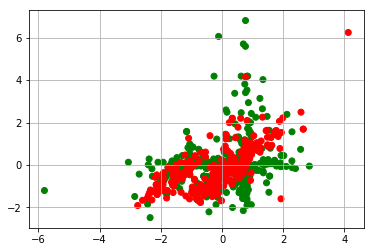

In [115]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(tot_OI[:,0], tot_OD[:,0],c=cat, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [126]:
predictClass = [0]*len(catB)
for i in range(len(catB)):
    distance = abs(tot_OD[i]-tot_OI[i]*0.6021)
    if distance > 0.7396444841 :
        predictClass[i] = 1;

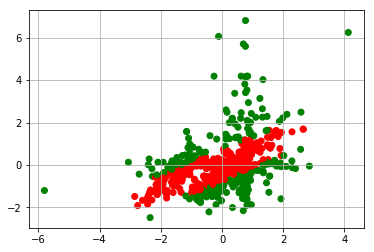

In [127]:
colors = ['red','green']
fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.scatter(tot_OI[:,0], tot_OD[:,0],c=predictClass, cmap=matplotlib.colors.ListedColormap(colors))

plt.show()

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(range(len(catB)),cat,test_size=0.25,random_state=40)

predictClass = [0]*len(X_test)
for i in range(len(X_test)):
    distance = abs(tot_OD[X_test[i]]-tot_OI[X_test[i]]*0.6021)
    if distance > 0.7396444841 :
        predictClass[i] = 1;
        
accuracy = accuracy_score(y_test,predictClass)
accuracy

0.6178343949044586